# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# 1.0 Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
##  . Objective: Predicting Car Prices.
##  . Sucess Criteria: Accurate Price Predictions

In [1071]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2.0 Data Understanding 

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1072]:
auto = pd.read_csv('data/vehicles.csv')

In [1073]:
auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [1074]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1075]:
df = auto.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


# 3.0 Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### * For simplicity, prepare the data prior to modeling by dropping these categorical features: region, id, state, VIN, paint_color and model   * 
### ** Main reason for removing region (392), state(51) , and model(5139) is due to their large number of unique values**

In [1076]:
features_to_remove = ['region','id','state','VIN','paint_color','model']
df = df.drop(features_to_remove,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         34868 non-null  int64  
 1   year          34868 non-null  float64
 2   manufacturer  34868 non-null  object 
 3   condition     34868 non-null  object 
 4   cylinders     34868 non-null  object 
 5   fuel          34868 non-null  object 
 6   odometer      34868 non-null  float64
 7   title_status  34868 non-null  object 
 8   transmission  34868 non-null  object 
 9   drive         34868 non-null  object 
 10  size          34868 non-null  object 
 11  type          34868 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [1107]:
df_copy = df.copy()
dff = df.copy()
df_copy.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
126,0,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van
127,0,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van
128,0,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van
215,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan
219,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan


# 4.0  Feature Engineering 
## 4.1  Convert  ordinal categories (  condition,cyclinders, size ) into numerical features 


In [1108]:
# Sample DataFrame with ordinal feature "condition" 
#df['condition'].unique()

# Define the order/ranking for the ordinal feature
condition_order = {'salvage': 1, 'fair': 2, 'good': 3, 'excellent' : 4 ,'like new' :5,'new':6}

# Apply ordinal encoding to create a new numerical feature
dff['condition_num'] = dff['condition'].map(condition_order)
# Remove the original ordinal category "condition" from the DataFrame
dff.drop('condition', axis=1, inplace=True)

In [1109]:
# Sample DataFrame with ordinal feature "cylinders" 
#df['cylinders'].unique()

# Define the order/ranking for the ordinal feature " cylinders ""
cylinders_order = {'other': 1, '3 cylinders': 2, '4 cylinders': 3,'5 cylinders' : 4 , 
           '6 cylinders' :5,'8 cylinders':6, '10 cylinders' :7, '12 cylinders' : 8}

# Apply ordinal encoding to create a new numerical feature
dff['cylinders_num'] = dff['cylinders'].map(cylinders_order)
# Remove the original ordinal category "condition" from the DataFrame
dff.drop('cylinders', axis=1, inplace=True)

In [1115]:
# Sample DataFrame with ordinal feature "size" 
#df['size'].unique()

# Define the order/ranking for the ordinal feature " cylinders ""
size_order = {'sub-compact': 1, 'compact': 2, 'mid-size': 3,'full-size' : 4 } 

# Apply ordinal encoding to create a new numerical feature
dff['size_num'] = dff['size'].map(size_order)
# Remove the original ordinal category "condition" from the DataFrame
dff.drop('size', axis=1, inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          34868 non-null  int64  
 1   year           34868 non-null  float64
 2   manufacturer   34868 non-null  object 
 3   fuel           34868 non-null  object 
 4   odometer       34868 non-null  float64
 5   title_status   34868 non-null  object 
 6   transmission   34868 non-null  object 
 7   drive          34868 non-null  object 
 8   type           34868 non-null  object 
 9   condition_num  34868 non-null  int64  
 10  cylinders_num  34868 non-null  int64  
 11  size_num       34868 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 3.5+ MB


## 4.2 Features Correlation (Numerical + Ordinals ) to price 


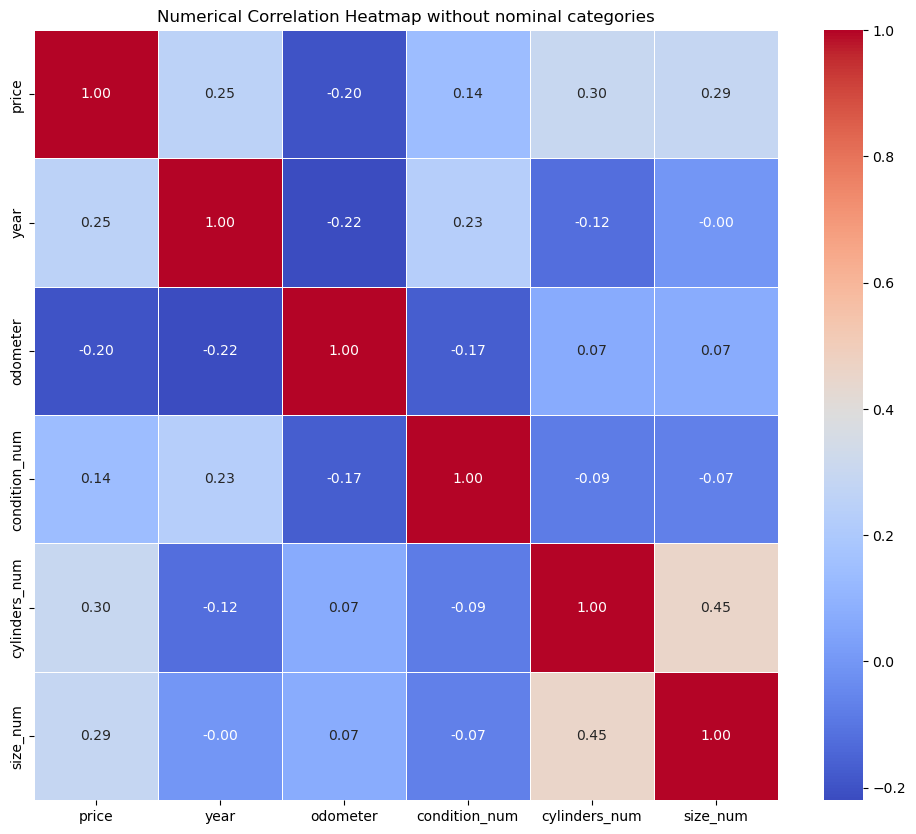

In [1116]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with both numerical and categorical features
# Replace 'df' with the actual name of your DataFrame

# Selecting numerical columns
num1_columns = dff.select_dtypes(include=['float64', 'int64']).columns
num1_data = dff[num1_columns]

# Calculating correlation matrix for numerical features
num1_correlation_matrix = num1_data.corr()

# Creating a heatmap for numerical correlations
plt.figure(figsize=(12, 10))
sns.heatmap(num1_correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Numerical Correlation Heatmap without nominal categories')
plt.show()

## 4.3 Convert nominally categorical columns to numerical 

### * nominal category features: 'manufacturer', 'type', 'fuel', 'title_status','transmission','drive' *

In [1119]:
# Separate nominal and numerical columns
numerical_cols = ['year', 'odometer', 'condition_num', 'cylinders_num','price']
nominal_cols = ['manufacturer', 'fuel','title_status','transmission','drive','type']

# One-hot encode nominal columns
encoder = OneHotEncoder(drop='first', sparse=False)
nominal_encoded = encoder.fit_transform(dff[nominal_cols])
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=encoder.get_feature_names_out(nominal_cols))

# Combine with numerical columns
mydf = pd.concat([dff[numerical_cols], nominal_encoded_df], axis=1)

# Display the combined DataFrame
print("Combined DataFrame:")
mydf.head()

Combined DataFrame:


/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,year,odometer,condition_num,cylinders_num,price,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
126,2018.0,68472.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127,2019.0,69125.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
128,2018.0,66555.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
215,2002.0,155000.0,4.0,3.0,4000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
219,1995.0,110661.0,2.0,5.0,2500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 4.5 All Features (numerical + ordinal + nominal ) Correlation with Car Price

In [1120]:
mydf.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
cylinders_num,0.296847
year,0.254059
condition_num,0.138468
fuel_gas,0.056626
...,...
manufacturer_datsun,NaN
manufacturer_ferrari,NaN
manufacturer_land rover,NaN
manufacturer_tesla,NaN


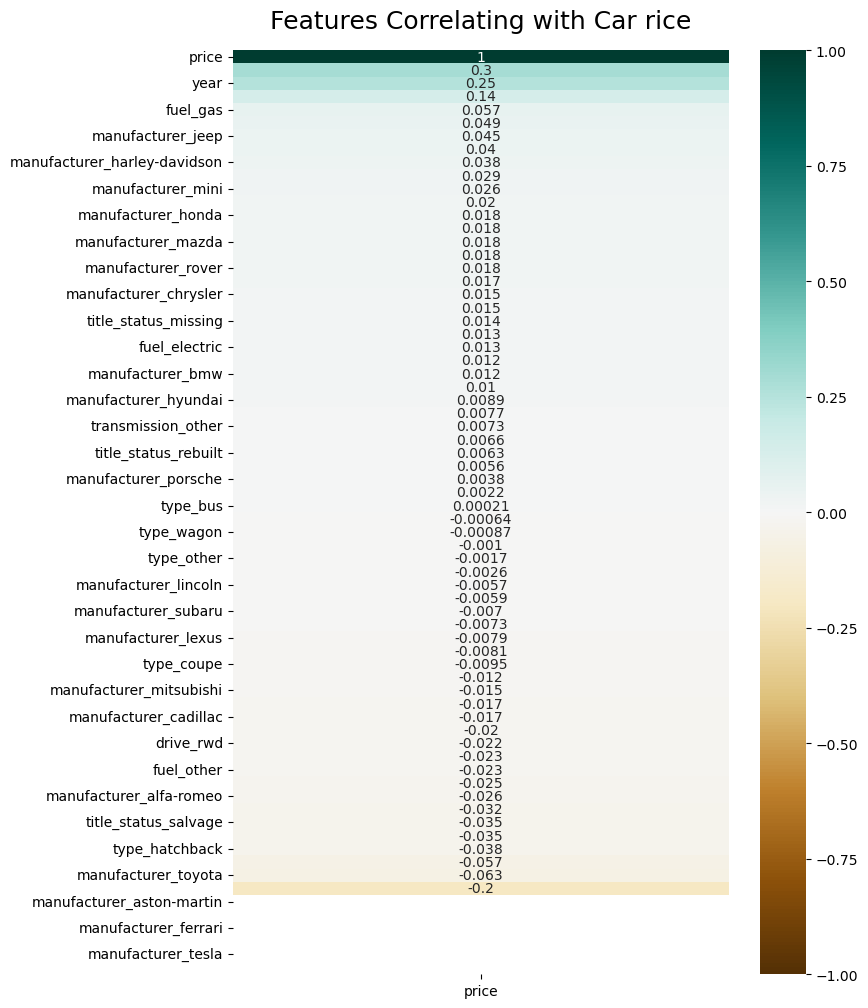

In [1121]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(mydf.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Car rice', fontdict={'fontsize':18}, pad=16);

# 7.0 Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## 7.1 Linear Regressions 
### 7.1.1 Simple model +  all provided features (2 standardized numericals+ 3 ordinals + 6 nominals)

In [1122]:
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
# Assuming df is your DataFrame with mixed feature types
# Replace 'df' with the actual name of your DataFrame

# Assuming my data frame has  the following columns
numerical_columns = ['year', 'odometer','condition_num','cylinders_num','size_num']
nominal_columns   = ['manufacturer', 'type', 'fuel', 'title_status', 'transmission', 'drive']
target_column     = ['price']

# Specify the desired order
desired_order = numerical_columns + nominal_columns + target_column

df0 = dff.copy()
df0 = df0[desired_order]
df0 = df0.astype({"condition_num":'float', "cylinders_num":'float', "size_num":'float',"price":'float'})

# Assuming your target variable is in a column named 'price'
X0 = df0.drop('price', axis=1)
y0 = df0['price']

# Split the data into training and testing sets
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=42)


# Create a ColumnTransformer with ordinal mapping
preprocessor0 = ColumnTransformer(
   transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('nominal', OneHotEncoder(), nominal_columns)
    ])
preprocessor0.fit_transform(X0_train)
#    remainder='passthrough'  # Pass through columns not specified in transformers
#)

# Create a pipeline with ColumnTransformer and LinearRegression
pipe0 = Pipeline([
    ('preprocessor0', preprocessor0),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe0.fit(X0_train, y0_train)

# Make predictions on the test data
train0_predictions = pipe0.predict(X0_train)
test0_predictions = pipe0.predict(X0_test)
# Evaluate the model as needed

train0_mse = mean_squared_error(y0_train, train0_predictions)
test0_mse = mean_squared_error(y0_test, test0_predictions)
print(f'Train MSE from Simple LinearRegression + 11 features : {train0_mse}')
print(f'Test MSE from Simple  LinearRegression + 11 features : {test0_mse}')


Train MSE from Simple LinearRegression + 11 features : 102448969.78535765
Test MSE from Simple  LinearRegression + 11 features : 112433709.2277247


### 7.1.2 Regression including PolynomialFeatures + All 11 provided features 

In [1085]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a pipeline with ColumnTransformer, PolynomialFeatures, and LinearRegression
lp = Pipeline([
    ('preprocessor', preprocessor0),
    ('polynomial_features', PolynomialFeatures(degree=2)),  # Adjust the degree as needed
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
lp.fit(X0_train, y0_train)

# Make predictions on the test data
lp_train_predictions = lp.predict(X0_train)
lp_test_predictions = lp.predict(X0_test)

# Evaluate the model as needed
# For example, you can use metrics like mean squared error (MSE)
from sklearn.metrics import mean_squared_error
lp_train_mse = mean_squared_error(y0_train, lp_train_predictions)
lp_test_mse = mean_squared_error(y0_test, lp_test_predictions)
print(f'Train MSE from LinearRegression with PolynomialFeatures + 11 Features: {lp_train_mse}')
print(f'Test MSE from LinearRegression with  PolynomialFeatures + 11 features : {lp_test_mse}')


Train MSE from LinearRegression with PolynomialFeatures + 11 Features: 66797264.2169637
Test MSE from LinearRegression with  PolynomialFeatures + 11 features : 96956814.21888344


### 7.1.3  Regression + PolynomialFeatures (degree =2)+ 6 features 

In [1086]:
# Assuming my data frame has  the following columns
sf_numerical_columns = ['year','condition_num','size_num']
sf_nominal_columns   = ['manufacturer', 'type', 'fuel']
target_column              = ['price']

# Specify the desired order
sf_desired_order = selected_numerical_columns + selected_nominal_columns + target_column
df1 = dff.copy()
# Rearrange the columns in df_copy
sf_df = df1.drop(columns = ['odometer','cylinders_num', 'title_status', 'transmission', 'drive'], axis=1)
sf_df = sf_df[sf_desired_order]
sf_df.head()

# Assuming your target variable is in a column named 'price'
Xsub = sf_df.drop('price', axis=1)
ysub = sf_df['price']

# Split the data into training and testing sets
Xsub_train, Xsub_test, ysub_train, ysub_test = train_test_split(Xsub, ysub, test_size=0.3, random_state=42)

# Create a ColumnTransformer with selected 6 features only
preprocessor_sf = ColumnTransformer(
   transformers=[
        ('numerical', StandardScaler(), sf_numerical_columns),
        ('nominal', OneHotEncoder(), sf_nominal_columns)
   ])
preprocessor_sf.fit_transform(Xsub_train)

# Create a pipeline with ColumnTransformer, PolynomialFeatures, and LinearRegression
sf_pipe= Pipeline([
    ('preprocessor', preprocessor_sf),
    ('polynomial_features', PolynomialFeatures(degree=2)),  # Adjust the degree as needed
    ('regressor', LinearRegression())
])


# Fit the pipeline on the training data
sf_pipe.fit(Xsub_train, ysub_train)

# Make predictions on the test data
sf_train_predictions = sf_pipe.predict(Xsub_train)
sf_test_predictions = sf_pipe.predict(Xsub_test)
# Evaluate the model as needed

train_sf_mse = mean_squared_error(ysub_train, sf_train_predictions)
test_sf_mse = mean_squared_error(ysub_test, sf_test_predictions)
print(f'Selected_Features Train MSE from LinearRegression  PolynomialFeatures + 6 features : {train_sf_mse}')
print(f'Selected_Features Test MSE from LinearRegression + PolynomialFeatures + 6 features: {test_sf_mse}')

Selected_Features Train MSE from LinearRegression  PolynomialFeatures + 6 features : 83885528.7313069
Selected_Features Test MSE from LinearRegression + PolynomialFeatures + 6 features: 99967884.39063606


In [1087]:
### 7.1.4  Regression + PolynomialFeatures (degree = 3)+ 6 features 

In [1088]:
# Create a ColumnTransformer with selected 6 features only
preprocessor_sf = ColumnTransformer(
   transformers=[
        ('numerical', StandardScaler(), sf_numerical_columns),
        ('nominal', OneHotEncoder(), sf_nominal_columns)
   ])
preprocessor_sf.fit_transform(Xsub_train)

# Create a pipeline with ColumnTransformer, PolynomialFeatures, and LinearRegression
sf3_pipe= Pipeline([
    ('preprocessor', preprocessor_sf),
    ('polynomial_features', PolynomialFeatures(degree=3)),  # Adjust the degree as needed
    ('regressor', LinearRegression())
])


# Fit the pipeline on the training data
sf3_pipe.fit(Xsub_train, ysub_train)

# Make predictions on the test data
sf3_train_predictions = sf3_pipe.predict(Xsub_train)
sf3_test_predictions = sf3_pipe.predict(Xsub_test)
# Evaluate the model as needed

train_sf3_mse = mean_squared_error(ysub_train, sf3_train_predictions)
test_sf3_mse = mean_squared_error(ysub_test, sf3_test_predictions)
print(f'Selected_Features Train MSE from LinearRegression  PolynomialFeatures + 6 features : {train_sf3_mse}')
print(f'Selected_Features Test MSE from LinearRegression + PolynomialFeatures + 6 features: {test_sf3_mse}')

Selected_Features Train MSE from LinearRegression  PolynomialFeatures + 6 features : 71304368.37049423
Selected_Features Test MSE from LinearRegression + PolynomialFeatures + 6 features: 110572851.00757656


## 7.2  Grid Search (pipeRidge) using 6 Features

In [1089]:
# Create a pipeline with ColumnTransformer and LinearRegression
pipeRidge = Pipeline([
    ('preprocessor', preprocessor_sf),
   ('ridge', Ridge())
])

In [1090]:
param_dict = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [1091]:
grid = GridSearchCV(pipeRidge, param_grid=param_dict)
grid.fit(Xsub_train, ysub_train)
grid_train_preds = grid.predict(Xsub_train)
grid_test_preds = grid.predict(Xsub_test)
grid_train_mse = mean_squared_error(ysub_train, grid_train_preds)
grid_test_mse = mean_squared_error(ysub_test, grid_test_preds)
grid_best_alpha = grid.best_params_
### END SOLUTION

# Answer check
print(f'Train MSE from pipeRidge + All features : {grid_train_mse}')
print(f'Test MSE  from pipeRidge + All Features : {grid_test_mse}')
print(f'Best Alpha: {list(grid_best_alpha.values())[0]}')


Train MSE from pipeRidge + All features : 111581568.8389917
Test MSE  from pipeRidge + All Features : 118987568.87833197
Best Alpha: 0.1


## 7.3 Lasso with 6 features 

In [1092]:
# Create a pipeline with ColumnTransformer, PolynomialFeatures, and Lasso
lassopipe= Pipeline([
    ('preprocessor', preprocessor_sf),
    ('lasso', Lasso(random_state = 42))
])

# Fit the pipeline on the training data
lassopipe.fit(Xsub_train, ysub_train)

# Make predictions on the test data
lasso_train_predictions = lassopipe.predict(Xsub_train)
lasso_test_predictions = lassopipe.predict(Xsub_test)

# Evaluate the model as needed
# For example, you can use metrics like mean squared error (MSE)
from sklearn.metrics import mean_squared_error
lasso_train_mse = mean_squared_error(ysub_train, lasso_train_predictions)
lasso_test_mse = mean_squared_error(ysub_test, lasso_test_predictions)
print(f'Train MSE from Lasso with PolynomialFeatures + 11 Features: {lasso_train_mse}')
print(f'Test MSE from Lasso with PolynomialFeatures + 11 features : {lasso_test_mse}')

Train MSE from Lasso with PolynomialFeatures + 11 Features: 111625660.72249018
Test MSE from Lasso with PolynomialFeatures + 11 features : 118989605.17836618


# 8.0  Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### 8.1.1 CV for Simple model +  11 features (2 standardized numericals+ 3 ordinals + 6 nominals)

In [1093]:
# Evaluate the simple linear regression model using cross-validation
cv0_scores = cross_val_score(pipe0, X0, y0, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cv0_scores = -cv0_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cv0_scores)
print("Mean CV MSE:", cv0_scores.mean())
print("Standard Deviation of CV MSE:", cv0_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

Cross-validation MSE scores: [1.08361727e+08            nan 1.10671959e+08            nan
 9.36909738e+07]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

### 8.1.2 CV for Simple model+ PolynomialFeatures +  11 features 

In [1094]:

# Evaluate the model using cross-validation
cvlp_scores = cross_val_score(lp, X0, y0, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cvlp_scores = -cv1_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cvlp_scores)
print("Mean CV MSE:", cvlp_scores.mean())
print("Standard Deviation of CV MSE:", cvlp_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

Cross-validation MSE scores: [1.08361727e+08            nan 1.10671959e+08            nan
 9.36909738e+07]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


### 8.1.3 CV for Regression + PolynomialFeatures(degree = 2)  +  6 features 

In [1095]:
# Evaluate the model using cross-validation
cv1_scores = cross_val_score(sf_pipe, Xsub, ysub, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cv1_scores = -cv0_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cv1_scores)
print("Mean CV MSE:", cv1_scores.mean())
print("Standard Deviation of CV MSE:", cv1_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

Cross-validation MSE scores: [-1.08361727e+08             nan -1.10671959e+08             nan
 -9.36909738e+07]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


### 8.1.4 CV for Regression + PolynomialFeatures(degree = 3)  +  6 features 

In [1096]:
# Evaluate the model using cross-validation
cv2_scores = cross_val_score(sf3_pipe, Xsub, ysub, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cv2_scores = -cv0_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cv2_scores)
print("Mean CV MSE:", cv2_scores.mean())
print("Standard Deviation of CV MSE:", cv2_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

Cross-validation MSE scores: [-1.08361727e+08             nan -1.10671959e+08             nan
 -9.36909738e+07]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


### 8.2 CV for Ridge  +  6 features 

In [1097]:
# Evaluate the model using cross-validation
cvgrid_scores = cross_val_score(grid, Xsub, ysub, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cvgrid_scores = -cvgrid_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cvgrid_scores)
print("Mean CV MSE:", cvgrid_scores.mean())
print("Standard Deviation of CV MSE:", cvgrid_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, 

Cross-validation MSE scores: [1.20521917e+08            nan 1.20094881e+08 1.20559618e+08
 1.03589431e+08]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


### 8.1.5 CV for Lasso + 6 features 

In [1098]:
# Evaluate the model using cross-validation
cvlasso_scores = cross_val_score(lassopipe, Xsub, ysub, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert the negative mean squared errors to positive
cvlasso_scores = -cvlasso_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", cvlasso_scores)
print("Mean CV MSE:", cvlasso_scores.mean())
print("Standard Deviation of CV MSE:", cvlasso_scores.std())

/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/toandtran/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 109, in _get_response_values
    y_pred, pos_label = estimator.predi

Cross-validation MSE scores: [1.20646849e+08            nan 1.20051108e+08 1.20456918e+08
 1.03667445e+08]
Mean CV MSE: nan
Standard Deviation of CV MSE: nan


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<table>
    <tr>
        <th>Trained Model +  Train/Test Split (80/20) + Feature_Numbers </th>
        <th>Features</th>
        <th>Test_MSE</th>
    </tr>
    <tr>
        <td>LinearRegression + 11 Features  </td>
        <td> year,odometer,condition,cylinders,size,manufacturer,type,fuel,title_status,transmission,drive </td>
        <td>112,433,709</td>
    </tr>
    <tr>
        <td>LinearRegression + PolynomialFeatures (degree =2) + 11 Features </td>
        <td> year,odometer,condition,cylinders,size,manufacturer,type,fuel,title_status,transmission,drive  </td>
        <td>112,433,709</td>
    </tr>
    <tr>
        <td>***LinearRegression + PolynomialFeatures (degree =2)  + 6 Features*** </td>
        <td> ***year, condition, size, manufacturer, type, fuel*** </td>
        <td>***99,967,884***</td>
    </tr>
    <tr>
        <td> LinearRegression + PolynomialFeatures (degree =3)  + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel</td>
        <td>110,572,851</td>
    </tr>
    <tr>
        <td>Ridge + GridSearch(best alpha =0.1) + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel</td>
        <td>112,433,709</td>
    </tr>
    <tr>
        <td>Lasso(Random_state=42)  + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel </td>
        <td> 118,989,605</td>
    </tr>
    </tr>
</table>



<table>
    <tr>
        <th>Trained Model +  Train/Test Split (80/20) + Feature_Numbers </th>
        <th>Features</th>
        <th>CV MSE Scores</th>
    </tr>
    <tr>
        <td>LinearRegression + 11 Features  </td>
        <td> year,odometer,condition,cylinders,size,manufacturer,type,fuel,title_status,transmission,drive </td>
        <td> 1.08e+08</td>
    </tr>
    <tr>
        <td>LinearRegression + PolynomialFeatures (degree =2) + 11 Features </td>
        <td> year,odometer,condition,cylinders,size,manufacturer,type,fuel,title_status,transmission,drive  </td>
        <td> 1.08e+08</td>
    </tr>
    <tr>
        <td>LinearRegression + PolynomialFeatures (degree =2)  + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel </td>
        <td>-1.08e+08</td>
    </tr>
    <tr>
        <td> LinearRegression + PolynomialFeatures (degree =3)  + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel</td>
        <td>-1.10e+08</td>
    </tr>
    <tr>
        <td>Ridge + GridSearch(best alpha =0.1) + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel</td>
        <td>1.21e+08</td>
    </tr>
    <tr>
        <td>Lasso(Random_state=42)  + 6 Features </td>
        <td> year, condition, size, manufacturer, type, fuel </td>
        <td>1.21e+08</td>
    </tr>
    </tr>  
</table>

### Status and Next Steps:

1. [DONE] Investigated possible improvements on  Test_MSE by using transformation on Targets, such as MinMaxScaler or StanddardScaler or log1p, ALL  actually have blown-up  Test_MSE 10X or more.
2. [NEXT STEPS] 
    a) Check if distribution on features or targets are skewed. If so, experiment with different functions, such as exp or SQRT or 1/3 etc...
    b) Permutation on the 6 selected alternate features to see if MSE can be smaller.
    c) Other models 

### Conclusion:

1. Six parameters are sufficient metrics to determine the used car price
2. Once permutation work is completed, a better resolution on critical features can be sorted out.